In [32]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [33]:
def potential(x):
    #2*x**2+3*torch.sin(torch.pi*x/2.4)*x*(1-torch.exp(-x/6))
    #x**3/20+torch.sin(torch.pi*x/10)*(20-x)*x+x**2/2
    #-10/x-8*(torch.sin(torch.pi*x/10))**2*torch.exp(-x/15)
    return -10/x

In [34]:
def energy(en_level,l,k,scale,device,dtype):
    en_list=[scale**2/(4*k*(i+1)**2) for i in range(en_level)]
    en_list=torch.tensor(en_list,device=device,dtype=dtype)
    return en_list

In [35]:
h_bar=1
m=1
b_lap:float=-h_bar**2/(2*m)

# 同时对于库伦势函数, 取e=1, 4\pi\epsilon_0=1, E_n=-1/(2n^2)
dtype=torch.float32
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

mult=1
La=0
Lb =400
L=Lb-La  # domain length
N = 4000  # number of interior points # 对时间成本来说几乎是平方量级
h :float= L / (N+1)
grid=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
grid=grid[1:-1].unsqueeze(-1)

# 控制势函数的大小
l_max=8
scale=10

en_num=50
extend_num=10
epoch=200000
lr=0.01

diag = -2.0 / h**2 * torch.ones(N,device=device) * b_lap
off_diag = 1.0 / h**2 * torch.ones(N - 1,device=device) * b_lap

In [36]:
V_diag=potential(grid)
A = torch.diag(diag) + torch.diag(off_diag,diagonal=1) + torch.diag(off_diag, diagonal=-1)+torch.diag(V_diag.flatten())
eigenvalues= torch.linalg.eigvals(A)
eigenvalues = torch.real(eigenvalues)
eigenvalues,_=torch.sort(eigenvalues)
en=eigenvalues[:en_num]
print("Eigenvalues: \n",en)

Eigenvalues: 
 tensor([-4.1424e+01, -1.1803e+01, -5.4089e+00, -3.0772e+00, -1.9799e+00,
        -1.3795e+00, -1.0148e+00, -7.7752e-01, -6.1542e-01, -4.9848e-01,
        -4.1184e-01, -3.4643e-01, -2.9517e-01, -2.5476e-01, -2.2206e-01,
        -1.9492e-01, -1.7303e-01, -1.5407e-01, -1.3822e-01, -1.2473e-01,
        -1.1309e-01, -1.0314e-01, -9.4160e-02, -8.6491e-02, -7.9672e-02,
        -7.3630e-02, -6.8282e-02, -6.3571e-02, -5.9178e-02, -5.5275e-02,
        -5.1726e-02, -4.8478e-02, -4.5548e-02, -4.2884e-02, -4.0433e-02,
        -3.8153e-02, -3.6076e-02, -3.4148e-02, -3.2381e-02, -3.0752e-02,
        -2.9239e-02, -2.7824e-02, -2.6497e-02, -2.5201e-02, -2.3850e-02,
        -2.2827e-02, -2.0735e-02, -1.9007e-02, -1.7171e-02, -1.5208e-02],
       device='cuda:0')


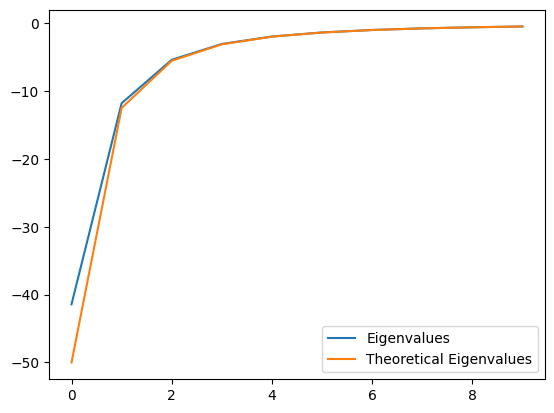

In [37]:
en_the=energy(en_num,l_max,b_lap,scale,device,dtype)
plt.plot(en[:10].cpu().numpy(),label='Eigenvalues')
plt.plot(en_the[:10].cpu().numpy(),label='Theoretical Eigenvalues')
plt.legend()
plt.show()

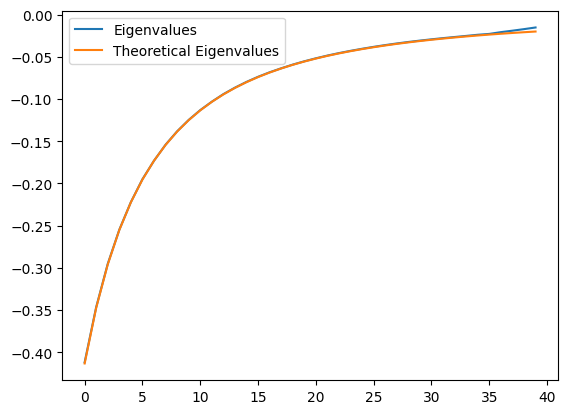

In [38]:
plt.plot(en[10:].cpu().numpy(),label='Eigenvalues')
plt.plot(en_the[10:].cpu().numpy(),label='Theoretical Eigenvalues')
plt.legend()
plt.show()

/tmp/ipykernel_1110993/1186928101.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


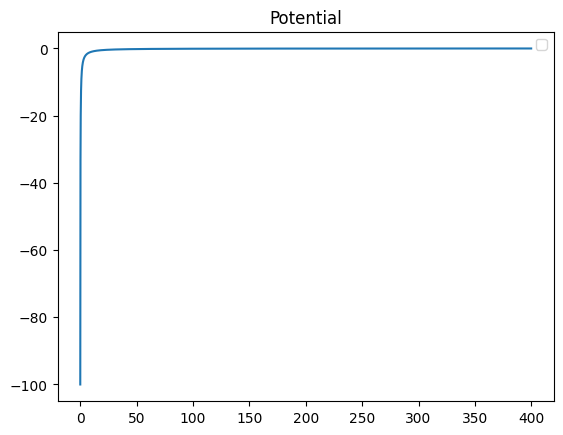

In [39]:
plt.plot(grid.cpu().numpy(),V_diag.cpu().numpy())
plt.title("Potential")
plt.legend()
plt.show()

In [40]:
eigs, eigv = torch.linalg.eigh(A)

# print("Eigenvalues: \n", eigs[:en_num])
# print("Eigenvectors: \n", eigv[:,:en_num])

tensor(1., device='cuda:0')
normalization: tensor(0.0520, device='cuda:0')


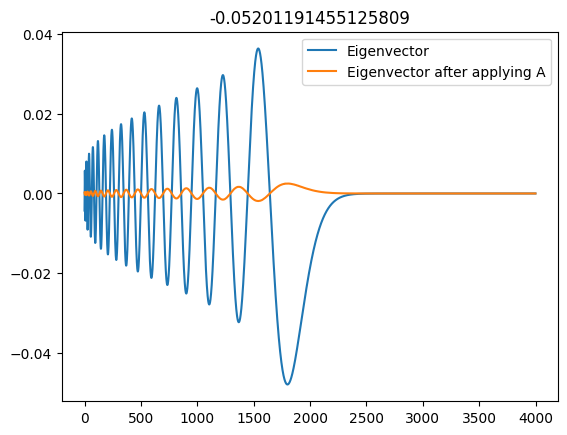

In [41]:
n=30
test_v=eigv[:,n]
test_vt=A@test_v
#归一化test_vt
# norm=torch.norm(test_vt)
# test_vt=test_vt/norm
print(torch.norm(test_v))
norm=torch.norm(test_vt)
print('normalization:',norm)

plt.plot(test_v.detach().cpu().numpy(),label="Eigenvector")
plt.plot(test_vt.detach().cpu().numpy(),label="Eigenvector after applying A")
plt.title(f'{eigs[n]}')
plt.legend()
plt.show()

tensor(1., device='cuda:0')


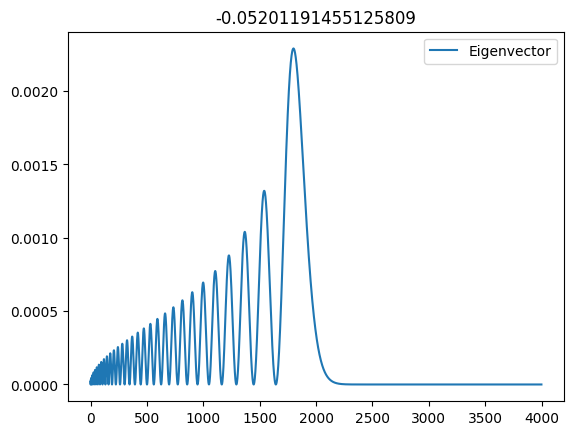

In [42]:
test_v=eigv[:,n]

# r=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
# R=r[1:-1]
# R=1/R 
# test_v=test_v*R

print(torch.norm(test_v))
test_v=test_v**2
#归一化test_vt
# norm=torch.norm(test_vt)
# test_vt=test_vt/norm



plt.plot(test_v.detach().cpu().numpy(),label="Eigenvector")
plt.title(f'{eigs[n]}')
plt.legend()
plt.show()